#### A notebook for visualizing inputs and outputs for this project

In [1]:
import geopandas as gpd
import rasterio
import rioxarray as rio
import matplotlib.pyplot as plt
import folium
import contextily as ctx
import os

In [2]:
base_dir = "../../"
raw_dir = os.path.join(base_dir, 'data', 'raw')
processed_dir = os.path.join(base_dir, "data", "processed")
results_dir = os.path.join(base_dir, 'data', "results")

In [3]:
# --- Load Rasters ---
mndwi_2016 = rio.open_rasterio(os.path.join(processed_dir, "2016_mndwi.tif"), masked=True)
mndwi_2020 = rio.open_rasterio(os.path.join(processed_dir, "2020_mndwi.tif"), masked=True)
mndwi_2025 = rio.open_rasterio(os.path.join(processed_dir, "2025_mndwi.tif"), masked=True)
mask_2016 = rio.open_rasterio(os.path.join(processed_dir, "2016_mndwi_watermask.tif"), masked=True)
mask_2020 = rio.open_rasterio(os.path.join(processed_dir, "2020_mndwi_watermask.tif"), masked=True)
mask_2025 = rio.open_rasterio(os.path.join(processed_dir, "2025_mndwi_watermask.tif"), masked=True)
dem = rio.open_rasterio(os.path.join(raw_dir, "dem.tif"), masked=True)

# --- Load Vectors ---
vector_2016 = gpd.read_file(os.path.join(processed_dir, "2016_mndwi_watermask.shp"))
vector_2020 = gpd.read_file(os.path.join(processed_dir, "2020_mndwi_watermask.shp"))
vector_2025 = gpd.read_file(os.path.join(processed_dir, "2025_mndwi_watermask.shp"))

dissolved_2016 = gpd.read_file(os.path.join(results_dir, "lake_2016.shp"))
dissolved_2020 = gpd.read_file(os.path.join(results_dir, "lake_2020.shp"))
dissolved_2025 = gpd.read_file(os.path.join(results_dir, "lake_2025.shp"))

shoreline_2016 = gpd.read_file(os.path.join(results_dir, "lake_2016_shoreline.shp"))
shoreline_2020 = gpd.read_file(os.path.join(results_dir, "lake_2020_shoreline.shp"))
shoreline_2025 = gpd.read_file(os.path.join(results_dir, "lake_2025_shoreline.shp"))

In [4]:
# --- CRS alignment check ---
print("Raster CRS:", mndwi_2016.rio.crs)
print("Vector CRS:", vector_2016.crs)
if vector_2016.crs != mndwi_2016.rio.crs:
    vector_2016 = vector_2016.to_crs(mndwi_2016.rio.crs)


Raster CRS: EPSG:32636
Vector CRS: EPSG:32636


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14716\4271617587.py:13: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  vec.boundary.plot(ax=ax, color="red", linewidth=1)


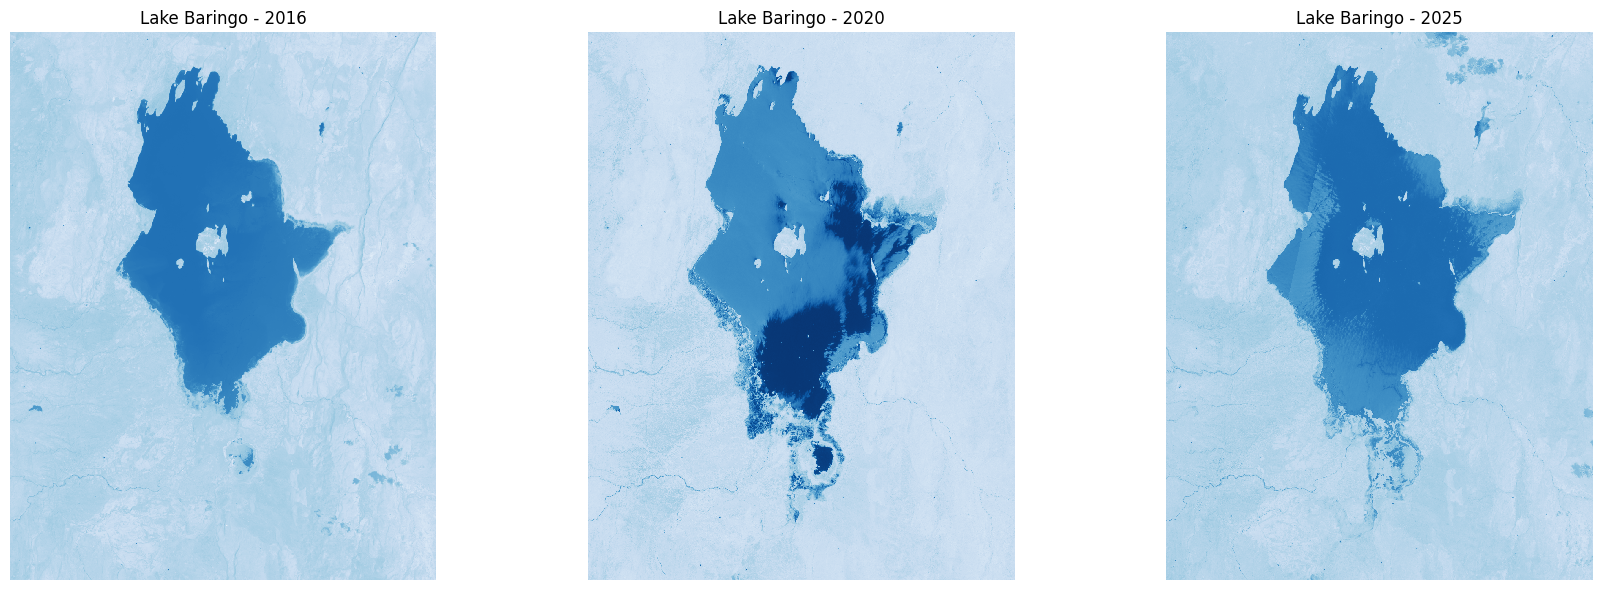

In [ ]:
# --- Static comparison ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (mndwi, vec, year) in zip(
    axes,
    [
        (mndwi_2016, dissolved_2016, 2016),
        (mndwi_2020, dissolved_2020, 2020),
        (mndwi_2025, dissolved_2025, 2025),
    ]
):
    mndwi.plot(ax=ax, cmap="Blues", add_colorbar=False)
    vec.boundary.plot(ax=ax, color="red", linewidth=1)
    ax.set_title(f"Lake Baringo - {year}")
    ax.axis("off")

plt.tight_layout()
plt.show()